In [1]:
import numpy as np
import math

class Network:
    def __init__(self, N, p, d):
        self.N = N  # 神经元数量
        self.p = p  # 存储的模式数量
        self.d = d  # 维度数
        self.V = np.zeros(N)  # 神经元的活动状态向量
        self.r = np.zeros((N, p, d))  # 神经元的特征表示矩阵
        self.J = np.zeros((N, N))  # 突触权重矩阵
        self.m = np.zeros(p)  # 计算模式重叠的数组
        self.g = 1.0  # 增益参数
        self.h0 = 0  # 偏置参数
        
    def BuildMaps(self):
        """ 初始化神经元的特征表示矩阵，随机分配特征值 """
        for i in range(self.N):
            for mu in range(self.p):
                for k in range(self.d):
                    self.r[i][mu][k] = np.random.uniform(0, 1)  # 生成0到1之间的随机值
        return
    
    def ReadMaps(self, R):
        """ 读取外部提供的特征表示矩阵 """
        self.r = R
        return
    
    def SetJ(self):
        """ 计算并设置突触权重矩阵 """
        for i in range(self.N):
            for j in range(self.N):
                if i != j:  # 只计算 i ≠ j 的情况
                    for mu in range(self.p):
                        self.J[i][j] += K1cos(self.r[i][mu], self.r[j][mu])  # 计算连接强度
        return
    
    def SetV0(self, a1):
        """ 初始化神经元的初始状态，并进行归一化 """
        self.V = np.random.uniform(0, 1, self.N)
        self.V = self.V * (a1 / np.mean(self.V))  # 归一化，使其均值为 a1
        return 
    
    def EvolveDynamics(self, a1, a2):
        """ 运行神经网络动力学，直到收敛 """
        Vold = np.zeros(self.N)  # 旧的状态变量
        h = np.zeros(self.N)  # 计算输入电流
        converged = False  # 是否收敛的标志
        it = 0  # 迭代计数器
        maxiter = 50  # 最大迭代次数
        
        while not converged and it < maxiter:
            h = np.dot(self.J, self.V)  # 计算输入电流
            self.V = np.asarray(list(map(lambda x: TF(x, self.h0, self.g), h)))  # 计算新的神经元状态
            self.FixParameters(h, a1, a2)  # 调整参数
            self.V = np.asarray(list(map(lambda x: TF(x, self.h0, self.g), h)))
            converged = CheckConvergence(self.V, Vold)  # 检查是否收敛
            Vold = self.V  # 更新状态
            it += 1
        return
        
    def TrackDynamics(self, a1, a2):
        """ 跟踪神经网络的动态演化（尚未实现） """
        return
        
    def FixParameters(self, h, a1, a2):
        """ 通过调整参数确保网络稳定 """
        maxiter = 1000000  # 最大迭代次数
        b = 0.01  # 步长参数
        tolerance = 0.01  # 误差容忍度
        fixed = False  # 是否已经修正的标志
        it = 0  # 迭代计数器
        
        while not fixed and it < maxiter:
            self.h0 += b * (pow(np.mean(self.V), 2) / np.mean(pow(self.V, 2)) - a2)  # 更新 h0
            self.V = np.asarray(list(map(lambda x: TF(x, self.h0, self.g), h)))
            fixed = (abs((pow(np.mean(self.V), 2) / np.mean(pow(self.V, 2)) - a2)) / a2 <= tolerance)  # 检查误差是否足够小
            
        self.g = a1 / np.mean(np.asarray(list(map(lambda x: TF(x, self.h0, 1), h))))  # 调整增益参数
        
        if it >= maxiter:
            print("迭代次数达到上限，参数修正失败！")
        return
    
    def CalculateOverlaps(self):
        """ 计算存储模式的重叠程度 """
        Vmean = np.mean(self.V)  # 计算神经元活动的均值
        sp = pow(np.mean(self.V), 2) / np.mean(pow(self.V, 2))  # 计算方差归一化因子
        
        for mu in range(self.p):
            for i in range(self.N):
                for j in range(self.N):
                    self.m[mu] += (self.V[i] - Vmean) * (self.V[j] - Vmean) * K1cos(self.r[i][mu], self.r[j][mu])
            self.m[mu] = np.sqrt(self.m[mu] / pow(float(self.N), 2)) / sp  # 归一化
        return
        
# 其他辅助函数

def TF(h, h0, g):
    """ 传递函数（阈值函数） """
    if (h - h0) > 0:
        return g * (h - h0)
    else:
        return 0.0
    
def K1cos(ri, rj):
    """ 计算神经元之间的权重，基于余弦相似度 """
    thetai = ri * 2 * math.pi
    thetaj = rj * 2 * math.pi
    return np.cos(thetai - thetaj) + 1  # 计算余弦相似度并加1


def CheckConvergence(V, Vold):
    """ 检查神经元状态是否收敛 """
    tolerance = 0.01  # 设定收敛阈值
    return abs(np.linalg.norm(V - Vold) / np.linalg.norm(V)) < tolerance

<ipython-input-1-9de2227fb4f8>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.J[i][j] += K1cos(self.r[i][mu], self.r[j][mu])  # 计算连接强度


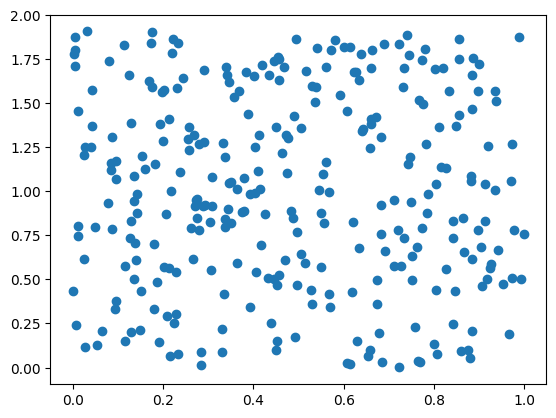

In [4]:
import matplotlib.pyplot as plt

Net = Network(300,2,1)
Net.BuildMaps()
Net.SetJ()
Net.SetV0(1)
Net.r.shape
plt.scatter(Net.r.T[0][0],Net.V)

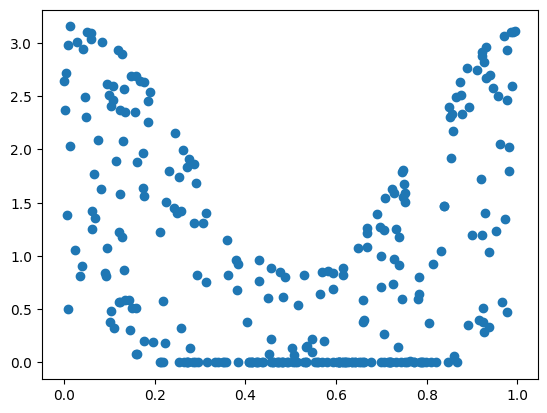

In [6]:
Net.EvolveDynamics(1,0.5)
plt.scatter(Net.r.T[0][1],Net.V)

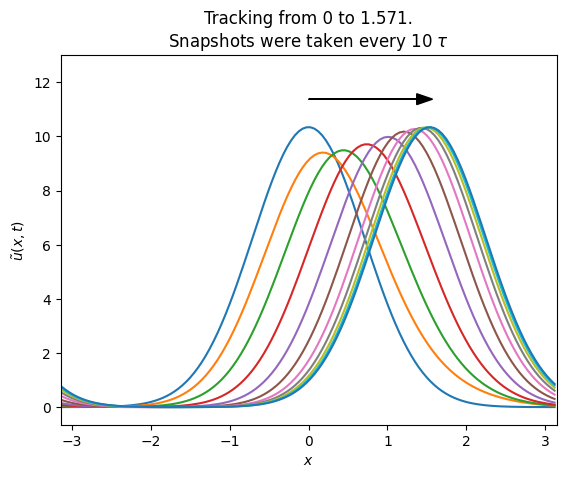

In [10]:
#!/usr/bin/env python3
import argparse

"""
https://arxiv.org/pdf/0801.4461
Program:  cann_base.py
Author:   Chi Chung Alan Fung

This program is an implementation of the model used in the papers by Fung, 
Wong and Wu in 2008 and 2010. This program is written for those who are 
interested in the work. Also, this program code could be a reference program 
code for researchers who are going to work on the model.

The equation used here may be slightly different from the equation reported in 
the paper by Fung, Wong and Wu (2008), due to the rescaling. The equation used 
here is given by

\tau \frac{du(x,t)}{dt} = 
-u(x,t) + \int dx^\prime J(x,x^\prime) r(x^\prime, t) 
+ A \exp\left[-\frac{\left|x-z_0\right|^2}{4a^2}\right]

J(x,x^\prime) = 
\left(\right)\exp\left[-\frac{\left|x-x^\prime\right|^2}{2a^2}\right]

r(x,t) =
\frac{u(x,t)^2}{1+(k/(8*\sqrt{2\pi}a))*\int dx^\prime u(x^\prime, t)^2}
"""

# Modules
import numpy as np
import scipy.integrate as spint
import matplotlib.pyplot as plt
import argparse

# Class for the model
class cann_model:
    # define the range of perferred stimuli
    z_min = - np.pi;              
    z_range = 2.0 * np.pi;
    # define the time scale
    tau = 1.0
        
    # function for periodic boundary condition
    def dist(self, c):
        tmp = np.remainder(c, self.z_range)
        
        # routine for numbers
        if isinstance(tmp, (int, float)):
            if tmp > (0.5 * self.z_range):
                return (tmp - self.z_range);
            return tmp;
        
        # routine for numpy arraies
        for tmp_1 in np.nditer(tmp, op_flags=['readwrite']):
            if tmp_1 > (0.5 * self.z_range):
                tmp_1[...] = tmp_1 - self.z_range;
        
        return tmp;
    
    # constructor (?)
    def __init__(self, argument):
        self.k = argument.k;    # rescaled inhibition
        self.a = argument.a;    # range of excitatory connection
        self.N = argument.N;    # number of units / neurons
        self.dx = self.z_range / self.N     # separation between neurons
        
        # define perferred stimuli for each neuron
        self.x = (np.arange(0,self.N,1)+0.5) * self.dx + self.z_min;
        
        # calculate the excitatory couple for each pair of neurons
        self.Jxx = np.zeros((self.N, self.N));
        for i in range(self.Jxx.shape[0]):
            for j in range(self.Jxx.shape[1]):
                self.Jxx[i][j] = \
                np.exp(-0.5 * np.square(self.dist(self.x[i] \
                                                  - self.x[j]) / self.a)) \
                / (np.sqrt(2*np.pi) * self.a);
                
        self.u = np.zeros((self.N));    # initialize neuronal inputs
        self.r = np.zeros((self.N));    # initialize neuronal activities
        self.input = np.zeros((self.N));    # initialial the external input
    
    # function for setting external iput for each neuron
    def set_input(self, A, z0):
        self.input = \
        A * np.exp(-0.25 * np.square(self.dist(self.x - z0) / self.a));
    
    # function for calculation of neuronal activity of each neuron
    def cal_r_or_u(self, u):
        u0 = 0.5 * (u + np.abs(u));
        r = np.square(u0);
        B = 1.0 + 0.125 * self.k * np.sum(r) * self.dx \
        / (np.sqrt(2*np.pi) * self.a);
        r = r / B;
        return r;
    
    # 
    def cm_of_u(self):
        max_i = self.u.argmax()
        cm = np.dot(self.dist(self.x - self.x[max_i]), self.u) / self.u.sum()
        cm = cm + self.x[max_i]
        return cm;
    
    # function for calculation of derivatives
    def get_dudt(self, t, u):
        dudt = \
        -u + np.dot(self.Jxx, self.cal_r_or_u(u)) * self.dx + self.input;
        dudt = dudt / self.tau;
        return dudt
        
                
"""
Begining of the program
"""
# acquiring parameters
parser = argparse.ArgumentParser(description="")

parser.add_argument("-k", metavar="float", type=float, \
                    help="rescaled Inhibition", default=0.5)

parser.add_argument("-a", metavar="float", type=float, \
                    help="width of excitatory couplings", default=0.5)

parser.add_argument("-N", metavar="int", type=int, \
                    help="number of excitatory units", default=128)

parser.add_argument("-A", metavar="float", type=float, \
                    help="magnitude of the external input", default=0.5)

parser.add_argument("-z0", metavar="float", type=float, \
                    help="sudden change of the external input", \
                    default=0.5*np.pi)

#arg = parser.parse_args()
arg, unknown = parser.parse_known_args()
# construct a CANN object
cann = cann_model(arg)

# setting up an initial condition of neuronal inputs 
# so that tracking can be reasonabl for small A and k < 1
if arg.k < 1.0:
    cann.set_input(np.sqrt(32.0)/arg.k, 0)
else:
    cann.set_input(np.sqrt(32.0), 0)
cann.u = cann.input

# setting up an external input according to the inputted parameter
cann.set_input(arg.A, 0)

# run the simulation for 100 tau to initialize the network state
# before the shift of the external input
out = spint.solve_ivp(cann.get_dudt, (0, 100), cann.u, method="RK45");

# update the network state in the CANN object
cann.u = out.y[:,-1]

# change the stimulus location from 0 to z0
cann.set_input(arg.A, arg.z0)

# take a initial snapshot
snapshots = np.array([cann.u])

# run the simulation and take snapshots every 10 taus
for t in range(0,20000,10):
    # decide the period of this step
    t0 = t
    t1 = t + 10
    # run the simulation and update the state in the CANN object
    out = spint.solve_ivp(cann.get_dudt, (t0, t1), cann.u, method="RK45");
    cann.u = out.y[:,-1]
    # store the snapshot
    snapshots = np.append(snapshots, [cann.u.transpose()], axis=0)
    # if the center of mass of the neuronal input is close to 
    # the destination, simulation terminates.
    if np.abs(cann.cm_of_u() - arg.z0) < (0.05):
        break;
    
# make a graphic output of the result
out_fig = plt.figure()

# define title and axes' title
plt.xlabel(r'$x$')
plt.ylabel(r'$\tilde{u}(x,t)$')
title_out = "Tracking from 0 to %0.3f.\n"\
+"Snapshots were taken every 10 "\
+r'$\tau$'
plt.title(title_out % arg.z0)

# determining right range for the plot
y_max_tmp = np.ceil(snapshots.max()*1.2)
plt.xlim(xmax=np.pi, xmin=-np.pi)
plt.ylim(ymax=y_max_tmp, ymin=y_max_tmp*-0.05)

# draw an arrow to indicate the direction
plt.arrow(0,cann.u.max()*1.1,(arg.z0-0.2),0, head_width=0.4, \
          head_length=0.2, color='black')

# plot all the stored snapshots
for i in range(snapshots.shape[0]):
    plt.plot(cann.x, snapshots[i,:])

# show the plot
out_fig.show()
plt.show()
